# Caroline Barte
# DSC Weeks 3-4 Exercise

# Introduction

## Purpose

In this scenario, I am the scheduler of these appointments. Given the White House Visitor Data, I want to identify trends in the appointments. I want to determine if there are certain days The White House should be open for appointment, and which days The White House should be closed. If certain days/months are less populated with visitors, there is less of a need to keep it open 24/7. This would save The White House money and time with staffing, would reduce unnecessary foot traffic, and would give the visitees more time for other necessary activities.

## Audience

The audience of my story will be The White House executive board, and the scheduler of the White House hours. The visitees may also be present to add insight to my conclusion of the schedule hours, so it can be tweaked as necessary. 

## Medium

I am planning to create a PowerPoint presentation to show my analysis findings and recommend the change of the schedule.

# Code

## Imports

In [1]:
import pandas as pd

In [2]:
jan = pd.read_csv('2023.01_WAVES-ACCESS-RECORDS.csv', low_memory=False)
feb = pd.read_csv('2023.02_WAVES-ACCESS-RECORDS.csv', low_memory=False)
mar = pd.read_csv('2023.03_WAVES-ACCESS-RECORDS.csv', low_memory=False)
apr = pd.read_csv('2023.04_WAVES-ACCESS-RECORDS.csv', low_memory=False)
may = pd.read_csv('2023.05_WAVES-ACCESS-RECORDS.csv', low_memory=False)
jun = pd.read_csv('2023.06_WAVES-ACCESS-RECORDS.csv', low_memory=False)
jul = pd.read_csv('2023.07_WAVES-ACCESS-RECORDS.csv', low_memory=False)
aug = pd.read_csv('2023.08_WAVES-ACCESS-RECORDS.csv', low_memory=False)
sep = pd.read_csv('2023.09_WAVES-ACCESS-RECORDS.csv', low_memory=False)
oct = pd.read_csv('2023.10_WAVES-ACCESS-RECORDS.csv', low_memory=False)
nov = pd.read_csv('2023.11_WAVES-ACCESS-RECORDS.csv', low_memory=False)
dec = pd.read_csv('2023.12_WAVES-ACCESS-RECORDS.csv', low_memory=False)

## Data Cleaning

In [3]:
# Combining Dataframes
df = pd.concat([jan, feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec], axis=0)

In [4]:
df.columns

Index(['Last Name', 'First Name', 'Middle Initial', 'UIN', 'BDGNBR',
       'Access Type', 'TOA', 'POA', 'TOD', 'POD', 'Appointment Made Date',
       'Appointment Start Date', 'Appointment End Date',
       'Appointment Cancel Date', 'Total People', 'Last Updated By', 'POST',
       'Last Entry Date', 'Terminal Suffix', 'Visitee Last Name',
       'Visitee First Name', 'Meeting Location', 'Meeting Room',
       'Caller Last Name', 'Caller First Name', 'CALLER_ROOM', 'RELEASEDATE',
       'Caller Room', 'Release Date'],
      dtype='object')

In [5]:
# Removing unnecessary columns
columns_to_remove = [
    'Last Name', 'First Name', 'TOA', 'POA','Middle Initial', 'UIN', 'BDGNBR',
    'Access Type', 'TOD', 'POD', 'Last Updated By', 'POST',
    'Last Entry Date', 'Terminal Suffix', 'Visitee Last Name',
    'Visitee First Name', 'Caller Last Name', 'Caller First Name',
    'CALLER_ROOM', 'RELEASEDATE', 'Caller Room', 'Release Date'
]
df = df.drop(columns=columns_to_remove)

In [6]:
df.columns

Index(['Appointment Made Date', 'Appointment Start Date',
       'Appointment End Date', 'Appointment Cancel Date', 'Total People',
       'Meeting Location', 'Meeting Room'],
      dtype='object')

In [7]:
# Convert date/time objects to date and timestamps
df['Appointment Made Date'] = pd.to_datetime(df['Appointment Made Date'])
df['Appointment Start Date'] = pd.to_datetime(df['Appointment Start Date'])
df['Appointment End Date'] = pd.to_datetime(df['Appointment End Date'])
df['Appointment Cancel Date'] = pd.to_datetime(df['Appointment Cancel Date'])

In [8]:
df.dtypes

Appointment Made Date      datetime64[ns]
Appointment Start Date     datetime64[ns]
Appointment End Date       datetime64[ns]
Appointment Cancel Date    datetime64[ns]
Total People                      float64
Meeting Location                   object
Meeting Room                       object
dtype: object

# Visualizations

In [9]:
import matplotlib.pyplot as plt

## 1: Start Date vs. Audience Size

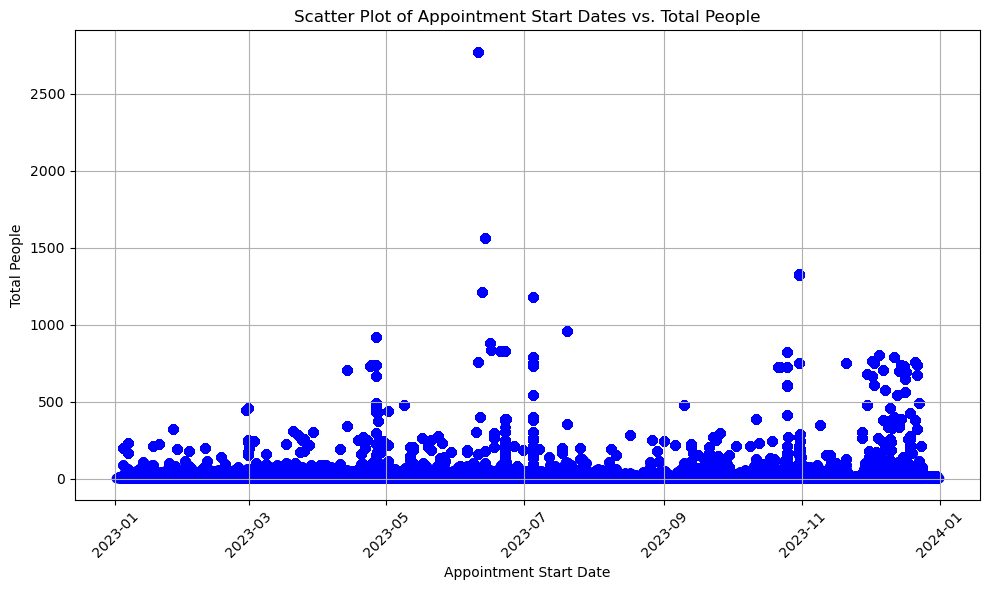

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Appointment Start Date'], df['Total People'], color='blue')
plt.title('Scatter Plot of Appointment Start Dates vs. Total People')
plt.xlabel('Appointment Start Date')
plt.ylabel('Total People')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

## 2: Days Between Appointment and Schedule

In [12]:
df['Days Between'] = (df['Appointment Start Date'] - df['Appointment Made Date']).dt.days

In [14]:
df['Month'] = df['Appointment Start Date'].dt.month

In [15]:
monthly_data = df.groupby('Month')['Days Between'].mean().reset_index()

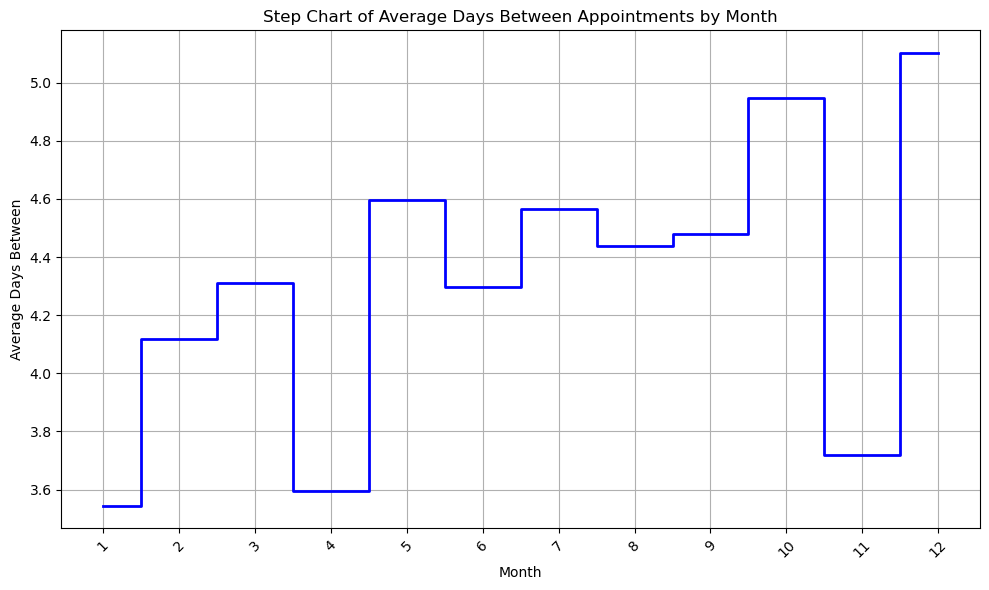

In [31]:
plt.figure(figsize=(10, 6))
plt.step(monthly_data['Month'], monthly_data['Days Between'], where='mid', color='blue', linewidth=2)
plt.title('Step Chart of Average Days Between Appointments by Month')
plt.xlabel('Month')
plt.ylabel('Average Days Between')
plt.xticks(monthly_data['Month'], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## 3: Average Duration of Appointment

In [20]:
df['Duration'] = df['Appointment End Date'] - df['Appointment Start Date']
df['Duration (Minutes)'] = df['Duration'].dt.total_seconds() / 60

In [21]:
monthly_avg_duration = df.groupby('Month')['Duration (Minutes)'].mean().reset_index()

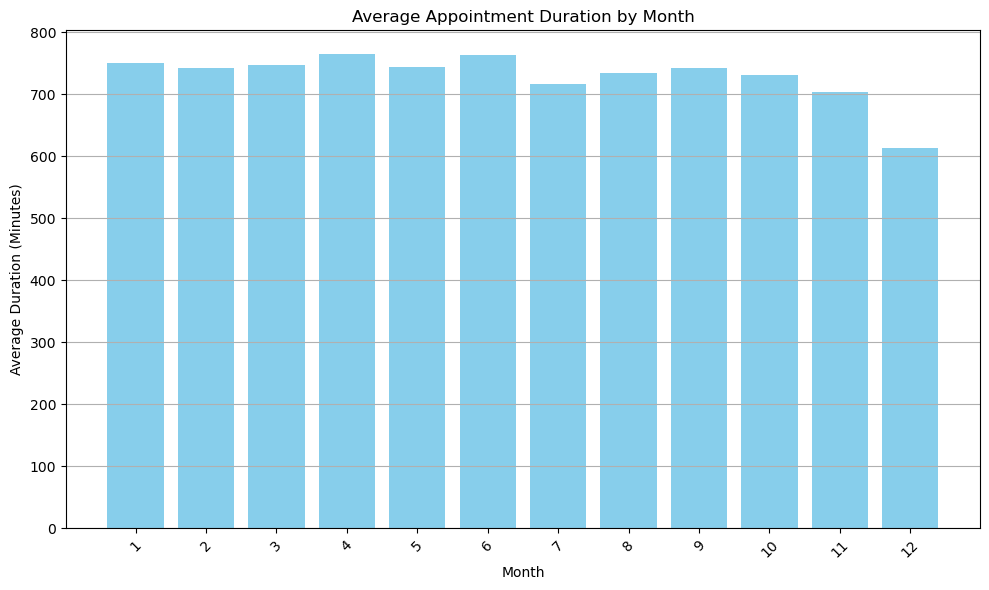

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_duration['Month'].astype(str), monthly_avg_duration['Duration (Minutes)'], color='skyblue')
plt.title('Average Appointment Duration by Month')
plt.xlabel('Month')
plt.ylabel('Average Duration (Minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 4: Count of Appointments by Month

In [23]:
monthly_meeting_count = df.groupby('Month')['Appointment Start Date'].count().reset_index(name='Meeting Count')

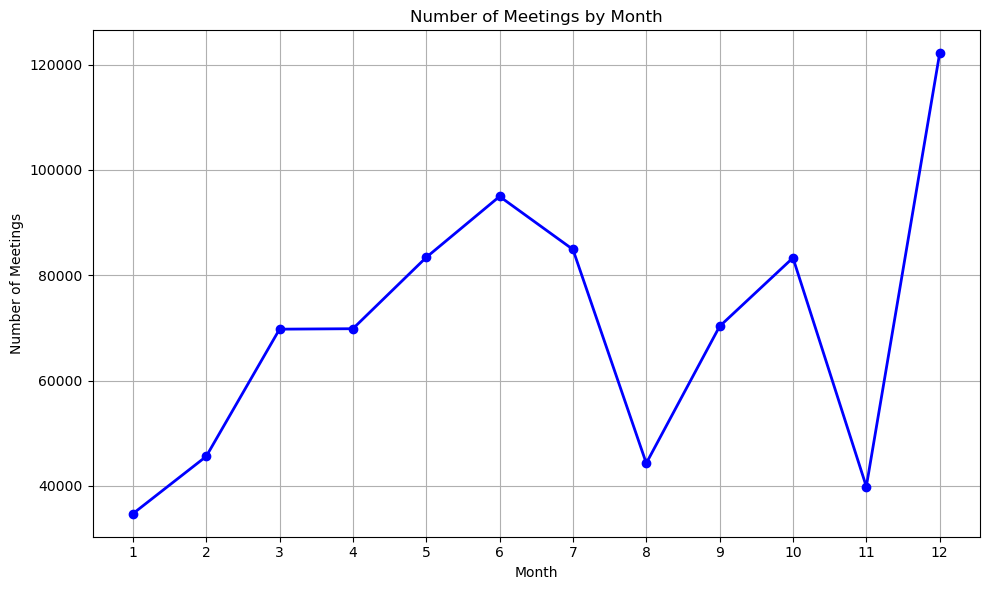

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_meeting_count['Month'], monthly_meeting_count['Meeting Count'], marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Number of Meetings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Meetings')
plt.xticks(monthly_meeting_count['Month'])
plt.grid(True)
plt.tight_layout()
plt.show()

## 5: Appointment Duration vs. Days Scheduled

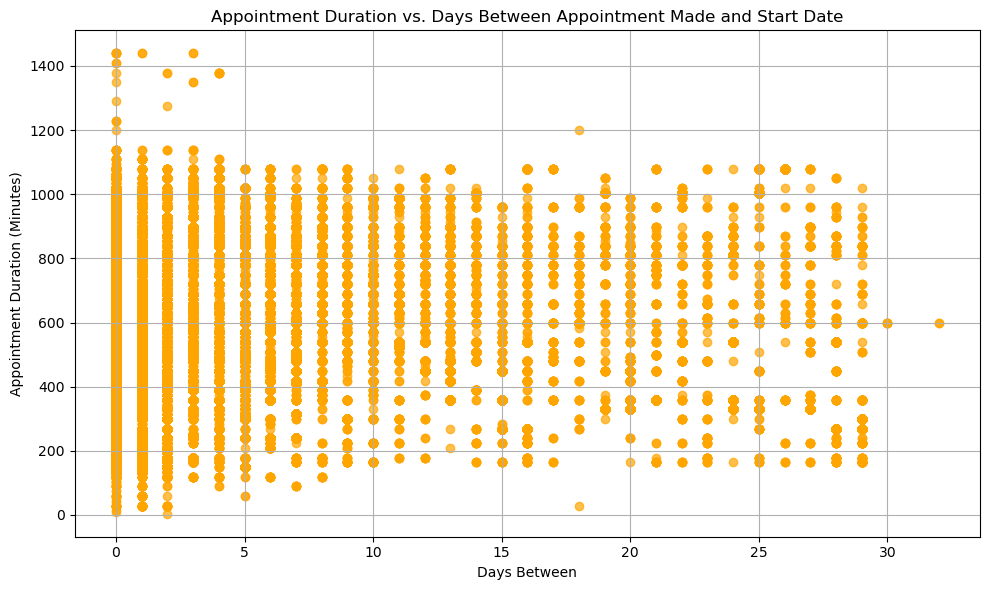

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Days Between'], df['Duration (Minutes)'], color='orange', alpha=0.7)
plt.title('Appointment Duration vs. Days Between Appointment Made and Start Date')
plt.xlabel('Days Between')
plt.ylabel('Appointment Duration (Minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 6: Total People in Meeting vs. Start Month

In [27]:
monthly_total_people = df.groupby('Month')['Total People'].sum().reset_index()

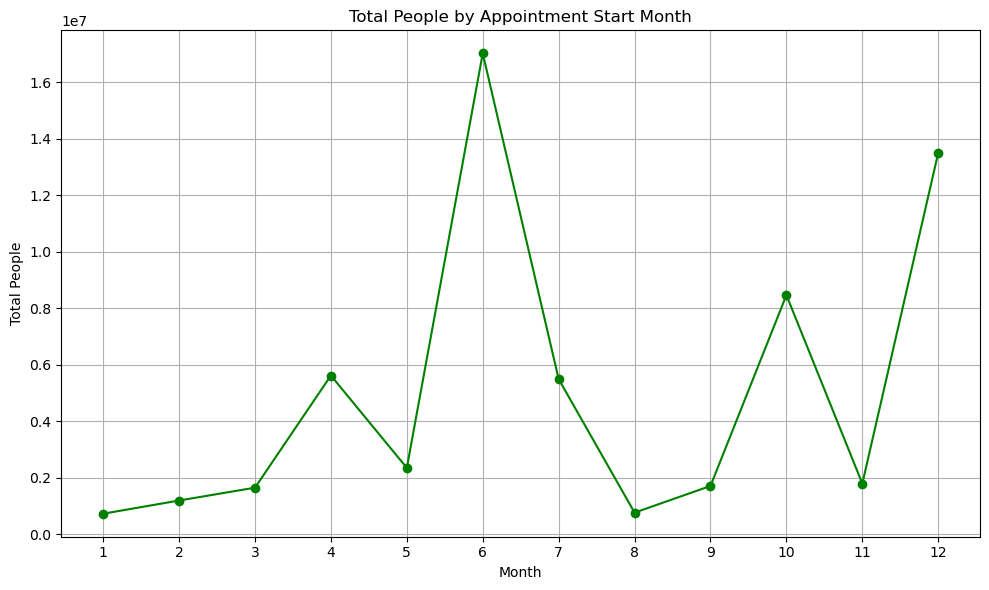

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_total_people['Month'], monthly_total_people['Total People'], marker='o', linestyle='-', color='green')
plt.title('Total People by Appointment Start Month')
plt.xlabel('Month')
plt.ylabel('Total People')
plt.xticks(monthly_total_people['Month'])
plt.grid(True)
plt.tight_layout()
plt.show()